In [3]:
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

import nltk
import spacy 



from matplotlib.pyplot import plot 
import seaborn as sns

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import phik
import warnings

# for all NLP related operations on text and identify the sentiment of text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# for NER
import spacy
from spacy import displacy  
import es_core_news_md

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("spanish"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

## 1. 

In [4]:
df = pd.read_csv('../data/dataTwitter_EN.csv')
pd.set_option('max_colwidth', None)
df.head()

,reviewId,content,score,langid,textcat,in_english
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,en,ces,0
4,8cfefb07-7f70-4214-abed-3929ae2069e7,"tem erros de rede social anã! menção que não chega, erro no player do vídeo, fora a censura que acontece",2,pt,por,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewId    29999 non-null  object
 1   content     29999 non-null  object
 2   score       29999 non-null  int64 
 3   langid      29999 non-null  object
 4   textcat     29999 non-null  object
 5   in_english  29999 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


#### Let's keep only the reviews in english and count the number of words by review 

In [5]:
df = df[(df['in_english'] == 1)]
df.shape

(18812, 6)

In [9]:
df['word_count'] = df['content'].str.split().map(lambda x: len(x))
df = df.drop(columns = ['reviewId', 'langid', 'textcat'])
df.head()

,content,score,in_english,word_count
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49
1,How i can verify my twitter's acc??,2,1,7
2,Love this app,5,1,3
5,Works for me!,4,1,3
6,Love it,5,1,2


In [14]:
df.describe(include= 'all')

,content,score,in_english,word_count
count,18812,18812.000000,18812.0,18812.000000
unique,16725,NaN,NaN,NaN
top,Great,NaN,NaN,NaN
freq,271,NaN,NaN,NaN
mean,NaN,3.445248,1.0,14.070168
std,NaN,1.776829,0.0,16.226694
min,NaN,1.000000,1.0,1.000000
25%,NaN,1.000000,1.0,4.000000
50%,NaN,4.000000,1.0,8.000000
75%,NaN,5.000000,1.0,17.000000


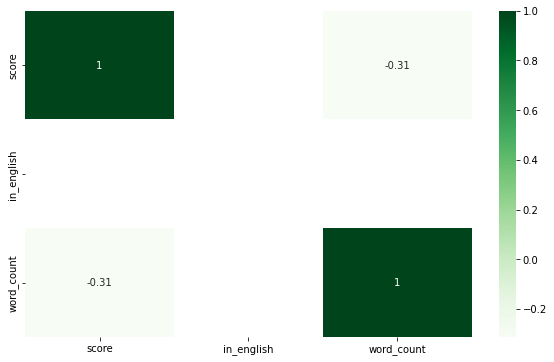

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap = 'Greens');

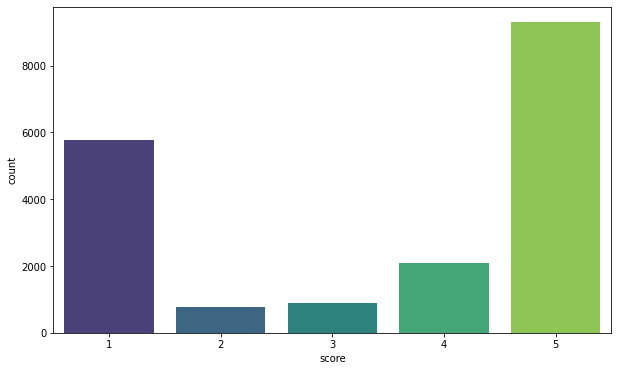

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'score', data=df, palette='viridis');

In [19]:
df['word_count'].value_counts().head()

2    1945
4    1395
3    1378
5    1279
6    1135
Name: word_count, dtype: int64

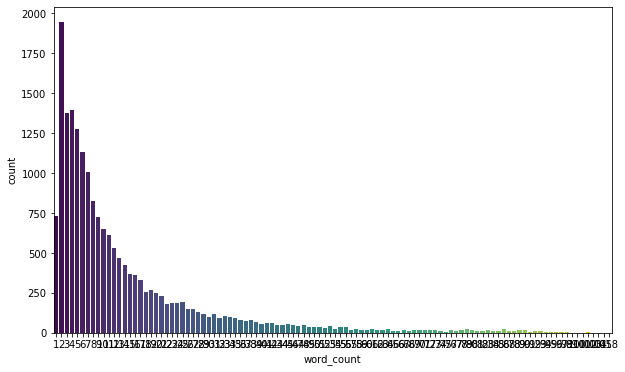

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'word_count', data=df, palette='viridis');